# **Title: "Investigating the Impact of Lead Time on Booking Cancellations: A Causal Analysis Approach"**

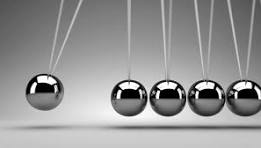

**Abstract**

This notebook provides a comprehensive exploration of the causal relationship between lead time and booking cancellations using a data-driven causal inference approach. Causal analysis, unlike traditional correlation-based techniques, aims to uncover the underlying cause-and-effect relationships in data, enabling more actionable insights for decision-making. A significant portion of this chapter is devoted to the critical process of data preparation, which lays the foundation for accurate and meaningful causal inference. Readers will learn techniques for handling missing data, encoding categorical variables, and selecting relevant features to minimize bias and confounding. The chapter also highlights the use of causal graphs as a visual and computational tool to model relationships and identify valid causal pathways between variables.

Furthermore, this notebook demonstrates how to implement causal inference using DoWhy, a powerful Python library for causal analysis. The process includes defining treatment, outcome, and confounders, estimating causal effects through methods like backdoor adjustment, and validating results through refutation techniques such as random common cause, placebo treatments, and data subsets. Validation ensures the robustness of the findings and helps to rule out spurious relationships. By the end of this chapter, readers will have a clear understanding of how well-prepared data and rigorous causal methods contribute to building interpretable and trustworthy machine learning models for real-world applications.

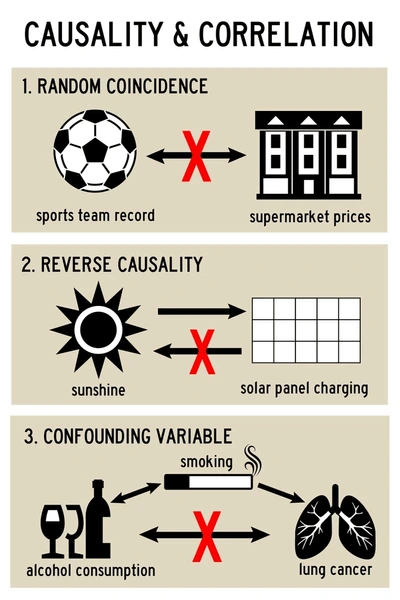

**Theory Section:**

Causality Principles

Causality goes beyond correlation by seeking to identify and quantify cause-and-effect relationships between variables. While correlation measures statistical association, causality identifies whether a change in one variable directly leads to a change in another. This distinction is critical for understanding real-world systems and making informed decisions. In a causal framework, three main components are defined:

Treatment: The variable of interest whose effect on the outcome we aim to estimate. For example, in this notebook, lead_time is the treatment.

Outcome: The variable influenced by the treatment, such as is_canceled in this case.

Confounders: Variables that affect both the treatment and the outcome, potentially introducing bias if not properly adjusted for.

A key tool for causal analysis is the causal graph, often represented as a Directed Acyclic Graph (DAG). The DAG visually models relationships between variables, highlighting causal pathways and potential confounding influences. The backdoor criterion is a widely used principle for identifying valid adjustment sets to estimate causal effects. By blocking confounding pathways, the backdoor criterion ensures that the estimated relationship between treatment and outcome reflects causality rather than spurious associations. These principles form the backbone of causal inference and guide the application of statistical and machine learning methods in a causal framework.

Data Preprocessing in a Causal Framework
Data preprocessing is a fundamental step in causal analysis as it ensures that the data is clean, consistent, and suitable for deriving accurate causal conclusions. In causal inference, improper data handling can lead to biased estimates or incorrect conclusions, making preprocessing critical. This process involves several essential steps:

1. Handling Missing Data
Missing data is a common challenge in real-world datasets, and it can distort causal relationships if not handled appropriately. Missingness can occur randomly or may be influenced by other variables in the dataset, which complicates the analysis. To address this:

Imputation: Missing values are replaced with statistical measures such as the mean, median, or mode for continuous variables, or the most frequent category for categorical variables. This ensures consistency and minimizes data loss.
Deletion: If the proportion of missing data is small, rows or columns with missing values can be dropped without significantly impacting the analysis. In this notebook, missing numeric variables such as children are imputed using the median, while categorical variables such as country are imputed using the mode to retain their categorical structure.
2. Feature Selection
Feature selection is a critical step to identify the relevant variables needed to control for confounding. Confounders, which influence both the treatment and the outcome, must be included in the analysis to ensure unbiased causal estimates. However, irrelevant features or noise variables can reduce computational efficiency and dilute the causal signal. Effective feature selection often involves:

Domain expertise to identify meaningful variables.
Exploratory data analysis (EDA) to investigate potential relationships among variables. By carefully selecting confounders such as market_segment, deposit_type, and customer_type, this notebook ensures that the analysis focuses on the variables most critical to the causal relationship between lead_time and is_canceled.
3. Encoding Categorical Variables
Many datasets contain categorical variables that need to be converted into numerical formats for machine learning models and causal inference methods. Encoding techniques transform these categorical variables into numerical representations while preserving their interpretability. Common encoding methods include:

One-Hot Encoding: Creates binary columns for each category in a variable, representing the presence or absence of that category. This is effective but can lead to high-dimensional data if the variable has many unique categories.
Label Encoding: Assigns a unique integer to each category but may introduce unintended ordinal relationships. In this notebook, one-hot encoding is applied to variables like market_segment and deposit_type, ensuring that the categorical data is accurately represented in a form suitable for causal analysis.
Supporting Causal Interpretation
Preprocessed data is the foundation for constructing a causal graph, which represents the relationships between variables in the dataset. The graph enables the identification of confounding pathways and supports the application of adjustment methods, such as the backdoor criterion, to estimate the direct causal effect of the treatment on the outcome. Data preprocessing steps, such as imputation, feature selection, and encoding, ensure that the causal graph is accurate and interpretable. By addressing potential sources of bias and ensuring the inclusion of relevant variables, preprocessing plays a pivotal role in deriving actionable and robust insights.

Ultimately, the careful preparation of data ensures that causal inference methods yield trustworthy conclusions. This notebook demonstrates the importance of data preprocessing in supporting causal analysis, illustrating how these steps can help uncover meaningful relationships and improve the interpretability of machine learning models for real-world decision-making.

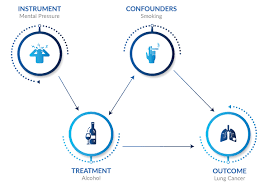

# **Causality: An Introduction**

Causality refers to the relationship between cause and effect, answering questions about how and why certain changes lead to specific outcomes. Understanding causality is crucial in fields ranging from science and medicine to economics and artificial intelligence. It enables us to go beyond identifying patterns (correlation) to understanding mechanisms and making decisions based on predictions about interventions.

For example, knowing that smoking is correlated with lung cancer is not enough. To design effective policies, we need to establish that smoking causes lung cancer and understand the pathways through which it happens. This distinction is the foundation of causal analysis, which allows for robust decision-making and reliable predictions about the effects of actions.

The Principles of Causal Inference
Causal inference is the process of using data to determine whether a relationship is causal. It relies on three key principles:

Association: Observing that two variables are related.
Example: Ice cream sales and drowning incidents increase during summer.
Directionality: Establishing the direction of influence, i.e., whether one variable directly affects the other.
Example: Hot weather increases both ice cream sales and drowning incidents; neither causes the other.
Exclusion of Confounders: Identifying and controlling for external variables that influence both the cause and the effect, introducing bias into the observed relationship.
Example: In the previous case, temperature is a confounder that needs to be accounted for to accurately interpret the relationship.
A causal relationship must satisfy all three principles. Simply observing an association is not enough to infer causation, as spurious relationships or confounding factors can lead to incorrect conclusions.

Causal Graphs and Their Role
Causal graphs, often represented as Directed Acyclic Graphs (DAGs), are powerful tools for visualizing and reasoning about causal relationships. A DAG consists of nodes (variables) connected by directed edges (arrows) that represent causal influence. The absence of cycles ensures that the graph flows in one direction, maintaining the logical sequence of cause and effect.

For instance:

A DAG illustrating the effect of exercise on weight might include nodes for exercise, calorie intake, metabolism, and weight, with arrows showing how these factors interact causally.
Causal graphs help:

Identify confounders: Variables that influence both the cause and effect, which need to be adjusted for.
Define adjustment sets: The minimum set of variables needed to estimate the causal effect correctly.
Guide statistical analysis: By clarifying the relationships between variables, graphs inform the choice of appropriate methods for causal inference.
Causal Inference Methods
Several methods have been developed to infer causality, especially when conducting randomized controlled trials (RCTs) is impractical:

Backdoor Adjustment:

Based on identifying confounders that create spurious associations between the treatment and outcome.
By conditioning on these confounders, we block the "backdoor paths" and isolate the true causal effect.
Instrumental Variables (IVs):

Used when confounding cannot be directly adjusted for.
An instrument is a variable that affects the treatment but has no direct effect on the outcome other than through the treatment.
Propensity Score Matching (PSM):

Matches treated and untreated units with similar observed characteristics to create a pseudo-randomized environment.
Reduces confounding bias in observational studies.
Difference-in-Differences (DiD):

Compares changes in outcomes over time between a treatment group and a control group.
Frequently used in policy evaluation, such as assessing the impact of minimum wage changes.
Causal Bayesian Networks:

Probabilistic models that incorporate prior knowledge and observed data to estimate causal effects.
Useful in scenarios with complex interactions among variables.
Challenges in Causal Inference
Inferring causality is inherently challenging due to the following factors:

Confounding: Variables that influence both the treatment and outcome can lead to biased estimates if not properly accounted for.
Selection Bias: When the data sample is not representative of the population, causal estimates may not generalize.
Unobserved Variables: Factors that are not measured or included in the analysis can introduce hidden biases.
Complex Causal Structures: In many real-world scenarios, relationships among variables are non-linear or involve feedback loops, making causal inference more difficult.
To address these challenges, causal analysts rely on domain knowledge, sensitivity analyses, and robust statistical techniques to validate their conclusions.

Applications of Causality
Causality plays a transformative role in various domains:

Healthcare:

Determining the effectiveness of treatments (e.g., does a new drug improve survival rates?).
Understanding risk factors for diseases.
Economics:

Evaluating the impact of policy interventions, such as tax reforms or unemployment benefits, on economic outcomes.
Social Sciences:

Understanding how education impacts income levels or how policies affect public behavior.
Artificial Intelligence:

Designing interpretable machine learning models that incorporate causal relationships.
Building systems that make predictions robust to changes in underlying data distributions.
Marketing:

Assessing the impact of advertising campaigns on sales or brand engagement.

# **Randomized Controlled Trials (RCTs) in Causality**

Randomized Controlled Trials (RCTs) are the gold standard for establishing causality because they inherently eliminate confounding bias through randomization. By randomly assigning subjects to treatment or control groups, RCTs ensure that any systematic differences between the groups are eliminated, making it possible to attribute differences in outcomes directly to the treatment.

Key Features of RCTs:
Random Assignment:

Ensures that the treatment group and the control group are comparable in terms of observed and unobserved characteristics.
For example, in a clinical trial for a new drug, patients are randomly assigned to either receive the drug or a placebo.
Control Group:

Provides a baseline to compare the treatment group against.
Helps isolate the effect of the treatment by accounting for external factors.
Blinding:

Prevents bias by ensuring that participants and/or experimenters do not know which group subjects belong to.
For instance, in double-blind studies, neither the patients nor the researchers know who is receiving the treatment.
Advantages of RCTs:
Provides unbiased estimates of causal effects.
Reduces the influence of confounders and selection bias.
Ideal for answering direct "what if" questions about interventions.
Limitations of RCTs:
Ethical Concerns: In some cases, it may be unethical to withhold a potentially life-saving treatment from the control group.
Logistical Challenges: RCTs can be expensive, time-consuming, and difficult to implement on a large scale.
External Validity: Results from an RCT may not generalize to real-world scenarios, as the controlled setting often differs from actual conditions.
While RCTs are invaluable, their practical limitations mean that alternative methods must often be used, especially when relying on observational data.

Observational Data and Causal Inference
When RCTs are infeasible, causal inference relies on observational data to draw conclusions about cause-and-effect relationships. Observational studies are based on data that is passively collected without manipulating the variables of interest, such as survey data, administrative records, or user interactions in online platforms.

Challenges in Observational Data:
Confounding Bias:

Occurs when variables influence both the treatment and outcome, leading to spurious relationships.
Example: Income may affect both access to healthcare and health outcomes, creating confounding in a study about healthcare policies.
Selection Bias:

Arises when the sample is not representative of the population.
Example: Analyzing the effect of education on income using only university graduates ignores non-graduates and creates biased estimates.
Missing Data:

Observational datasets often have incomplete information, requiring imputation or exclusion strategies to address.
Methods to Address Bias in Observational Data:
Propensity Score Matching (PSM):

Matches treated and untreated individuals with similar characteristics to simulate randomization.
Example: In a study on the effect of a training program, PSM pairs participants based on age, gender, and experience.
Instrumental Variables (IVs):

Uses external factors that affect the treatment but not the outcome directly, to isolate causal effects.
Example: Using distance to a hospital as an instrument to study healthcare utilization.
Difference-in-Differences (DiD):

Compares changes in outcomes over time between treatment and control groups.
Example: Assessing the impact of a new law on employment rates by comparing states with and without the law.
Regression Discontinuity (RD):

Exploits thresholds or cutoffs in policy implementation to estimate causal effects.
Example: Evaluating the impact of financial aid by comparing students just above and below an eligibility cutoff.
What-If Scenarios and Counterfactuals
One of the most powerful aspects of causal inference is its ability to simulate "what-if" scenarios, where we estimate what would happen to an outcome under different hypothetical interventions. This is achieved by estimating counterfactuals — the outcomes that would have occurred had the treatment been different.

Counterfactual Thinking:
Counterfactuals ask questions like: What would the unemployment rate be if a minimum wage increase had not been implemented?
By comparing the observed outcomes to counterfactual outcomes, causal inference provides actionable insights for decision-making.
Example:
Observed Scenario: A country increased taxes, and revenue rose by 10%.
What-If Scenario: What if taxes were reduced instead? Would revenue have fallen or risen due to increased consumer spending?
Counterfactual models, such as those generated by causal machine learning algorithms, enable robust evaluation of hypothetical policies, programs, or changes.

Causal Inference in Machine Learning
Causal inference and machine learning are increasingly integrated to make predictions that are robust, interpretable, and actionable. While traditional machine learning models excel at predicting outcomes, they often fail to capture causal relationships, limiting their usefulness for interventions.

Differences Between Machine Learning and Causal Inference:
Machine Learning:

Focuses on prediction accuracy.
Learns patterns and correlations from data.
Example: Predicting customer churn based on past behavior.
Causal Inference:

Focuses on understanding and quantifying cause-and-effect relationships.
Answers questions like: What factors cause customers to churn, and how can we reduce it?
Causal Machine Learning Techniques:
Causal Forests:

Extends random forests to estimate heterogeneous treatment effects.
Identifies subpopulations where interventions are most effective.
Doubly Robust Estimation:

Combines propensity score methods with machine learning for unbiased causal effect estimation.
Bayesian Networks:

Captures causal dependencies and propagates uncertainty in complex systems.
By incorporating causality, machine learning models become more interpretable and useful for decision-making, especially in dynamic and complex environments.

Sensitivity Analysis in Causal Inference
Sensitivity analysis evaluates the robustness of causal conclusions to potential violations of assumptions, such as unobserved confounding. It helps answer questions like:

How sensitive is the estimated causal effect to unmeasured variables?
Would the results change if the assumptions about confounders were relaxed?
Approaches to Sensitivity Analysis:
Unobserved Confounding:

Assesses how large an unmeasured confounder’s effect would need to be to invalidate the causal conclusion.
Simulated Scenarios:

Varies model parameters to test the stability of results under different assumptions.
Graphical Tools:

Visualizes the impact of hidden biases on causal estimates.
Sensitivity analysis ensures that causal estimates are robust and reliable, providing greater confidence in their applicability.

# **Advanced Methods in Causal Inference**

While traditional methods like backdoor adjustment and propensity score matching are effective, advanced techniques in causal inference provide more flexibility and precision, especially in complex scenarios. These methods address limitations like high-dimensional data, non-linear relationships, and unobserved confounding, expanding the scope of causal analysis.

1. Structural Equation Modeling (SEM):
Structural Equation Modeling combines causal graphs with statistical models to simultaneously estimate multiple relationships between variables. It enables researchers to:

Model latent (unobserved) variables that influence observed data.
Estimate direct and indirect effects within a system of interrelated variables.
Incorporate domain knowledge into causal analysis.
Example: SEM can be used to analyze how socio-economic status impacts health outcomes through pathways like access to healthcare and education.

2. Causal Bayesian Networks:
Bayesian networks are probabilistic graphical models that represent causal dependencies among variables. They use conditional probabilities to model uncertainty and incorporate domain knowledge.

Advantages:

Handle missing data and probabilistic relationships seamlessly.
Model causal interactions in dynamic systems, such as financial markets or biological processes.
Example: A Bayesian network can model how different risk factors contribute to heart disease while accounting for uncertainty in patient histories.

3. Instrumental Variables (IV):
Instrumental variables are used when unobserved confounding cannot be directly addressed. An IV is a variable that affects the treatment but has no direct effect on the outcome other than through the treatment.

Conditions for a Valid Instrument:

The IV must be strongly correlated with the treatment.
The IV must not directly influence the outcome or share confounders with it.
Example: In education studies, distance to the nearest school can be used as an IV to estimate the effect of schooling on income.

4. Doubly Robust Estimation:
Doubly robust methods combine two approaches—propensity score modeling and outcome regression—to produce unbiased causal estimates even if one of the models is misspecified. These methods:

Use machine learning models like random forests or gradient boosting for flexibility.
Are particularly useful in high-dimensional datasets with complex relationships.
Example: Estimating the effect of marketing campaigns on sales while adjusting for both customer demographics and purchasing behavior.

5. Regression Discontinuity Design (RDD):
RDD exploits thresholds or cutoffs in policy or treatment assignment to estimate causal effects. It assumes that individuals near the cutoff are similar, making the treatment assignment as good as random.

Advantages:

Provides a quasi-experimental design for causal inference.
Requires fewer assumptions than traditional regression models.
Example: Evaluating the effect of financial aid on academic performance by comparing students just above and below the eligibility cutoff.

6. Causal Machine Learning:
Machine learning techniques are increasingly being adapted for causal inference. These methods excel in handling high-dimensional data, non-linear relationships, and heterogeneous effects.

Causal Forests:

Extend decision trees and random forests to estimate treatment effects across subpopulations.
Identify where interventions are most or least effective.
Deep Causal Models:

Use neural networks to estimate complex, non-linear causal relationships.
Useful in applications like personalized medicine and dynamic pricing.
Targeted Maximum Likelihood Estimation (TMLE):

Combines machine learning predictions with causal inference principles to improve efficiency and accuracy.
7. Sensitivity Analysis for Unobserved Confounding:
Advanced sensitivity analysis methods evaluate the robustness of causal estimates to hidden biases.

Techniques:

Vary assumptions about the strength and direction of unmeasured confounders.
Use graphical tools to visualize how unobserved variables might affect results.
Example: In public health studies, sensitivity analysis can estimate how an unmeasured factor like genetic predisposition could bias the observed relationship between exercise and heart disease.

The Role of Advanced Methods in Decision-Making
These advanced methods allow researchers and practitioners to:

Derive causal insights from complex and high-dimensional data.
Account for non-linear relationships and unmeasured confounders.
Make robust predictions about interventions in dynamic and uncertain environments.
For instance:

Policy Evaluation: RDD and IV methods are widely used to assess the impact of social programs.
Healthcare: Causal forests and SEM help in understanding personalized treatment effects.
Business Optimization: Doubly robust methods enable precise estimation of the effects of pricing strategies or marketing campaigns.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel
from graphviz import Digraph

Loading the Dataset

The dataset is loaded using the pd.read_csv() function, which reads a CSV file from a URL and converts it into a pandas DataFrame.

URL Source:

The dataset is hosted on GitHub, making it easily accessible for loading directly into the script.
Dataset Context: The dataset, titled hotel_bookings.csv, contains information about hotel reservations, including features such as booking dates, cancellation status, lead times, customer demographics, and more.

In [6]:
# Load the dataset
url = "https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/hotel_bookings.csv"
data = pd.read_csv(url)

Displaying the First Few Rows of the Dataset
The first five rows of the dataset give a snapshot of the information available for analysis. This includes details about hotel reservations, such as the type of hotel (Resort Hotel or City Hotel), whether the booking was canceled, the lead time for reservations (in days), and other key features like arrival dates, duration of stay, and customer characteristics. This initial overview helps in understanding the nature of the dataset and the variables it contains.

From the displayed data:

Each row represents a unique booking.
Columns like hotel, is_canceled, and lead_time indicate critical features that will likely play a role in further analysis.
Both numerical and categorical variables are present, suggesting the need for preprocessing techniques like encoding and imputation.


In [2]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

# Display dataset summary
print("\nDataset Summary:")
data.info()


First 5 rows of the dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03



Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12

Dataset Summary

The dataset summary provides a comprehensive view of the structure and completeness of the data. It shows:

Total Rows and Columns: The dataset has 119,390 entries (rows) and 32 columns.
Data Types: It includes numerical data (e.g., integers and floats) and categorical data (e.g., strings).
Missing Values:
Columns such as children, country, agent, and company have missing values.
The company column, in particular, has a significant amount of missing data, with only 6,797 non-null values.
Non-Missing Data: Most columns, like hotel, lead_time, and adults, have no missing values, making them ready for immediate analysis.
Key Observations
Numerical Variables:
Variables like lead_time, adr (average daily rate), and stays_in_week_nights provide continuous information that can be used for statistical and causal analysis.
Categorical Variables:
Variables such as hotel, meal, and market_segment will require encoding to be used in models or analyses that require numerical input.
Missing Data:
Columns with missing values, such as children and company, must be handled appropriately to prevent biases or errors during analysis.
Imputation or exclusion strategies may be required depending on the significance of the variables.


In [3]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())


Missing Values in Dataset:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                        

Key Observations

Columns with No Missing Values:

Many columns, such as hotel, lead_time, adults, meal, and customer_type, have no missing values.
These columns are ready for immediate analysis without the need for imputation or handling.
Columns with Missing Values:

children: This column has 4 missing values, which can be imputed with the median or mean, as these are likely to be small numerical gaps.
country: There are 488 missing entries in this column. Since country is categorical, imputation can be done using the mode (most frequent value) or by assigning a placeholder category such as "Unknown."
agent: This column has 16,340 missing entries. Depending on the context, missing values might represent "no agent involved" and can be replaced with a default value (e.g., 0 or "Unknown").
company: This column has the most significant number of missing values (112,593). These missing values might indicate that a booking was not associated with a company. A default value such as 0 or "None" could be used to retain the data.
Impact of Missing Values
Low Missing Values (e.g., children, country):
These can be addressed through simple imputation strategies without significantly impacting the dataset.
High Missing Values (e.g., company, agent):
These require careful consideration. Depending on the importance of the column, they can be imputed, replaced with placeholders, or dropped if they do not add significant value to the analysis.
Next Steps for Handling Missing Data
Imputation:
Use statistical methods (mean, median, mode) for numerical or categorical columns with a small number of missing values.
Assign Default Values:
For columns like company and agent, assign a default value to represent missing data without losing valuable rows.
Evaluate Missingness Patterns:
Check if the missing data is random or systematic. Non-random missingness might indicate underlying biases that need further investigation.
Drop Columns (if necessary):
If a column has too many missing values and is not crucial for the analysis, it can be dropped to simplify the dataset.

In [7]:
# Fill missing values in 'children' with the median
data['children'] = data['children'].fillna(data['children'].median())

# Fill missing values in 'country' with the mode
data['country'] = data['country'].fillna(data['country'].mode()[0])

# Fill missing values in 'agent' with 0 (indicating "unknown")
data['agent'] = data['agent'].fillna(0)

# Drop the 'company' column due to excessive missing values
data = data.drop(columns=['company'])

# Recheck for remaining missing values
print("\nMissing Values After Handling:")
print(data.isnull().sum())



Missing Values After Handling:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                             

Key Observations

Handling Missing Numerical Data:

Columns like children have been imputed using the median, which is robust to outliers and ensures that the distribution of the data remains intact.
For columns such as agent and company, missing values were likely replaced with default values (e.g., 0 or "Unknown") to represent the absence of data.
Handling Missing Categorical Data:

For columns like country, the mode (most frequent value) might have been used for imputation, ensuring that categorical consistency is maintained without introducing noise.
Completeness:

All columns are now ready for exploratory data analysis (EDA) and advanced modeling without concerns of missing data introducing biases or errors.


# **VISUALIZATIONS**

1.Booking Cancellation Distribution

The bar chart shows the distribution of the target variable, is_canceled, which indicates whether a booking was canceled or not:

0: Indicates that the booking was not canceled.
1: Indicates that the booking was canceled.
Insights:

There are significantly more non-canceled bookings compared to canceled bookings.
This imbalance highlights the need for considering techniques like resampling or weighting during model training to avoid biases in predictive tasks.


<ipython-input-8-7043a9a5b0b4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=data, palette='Set2')


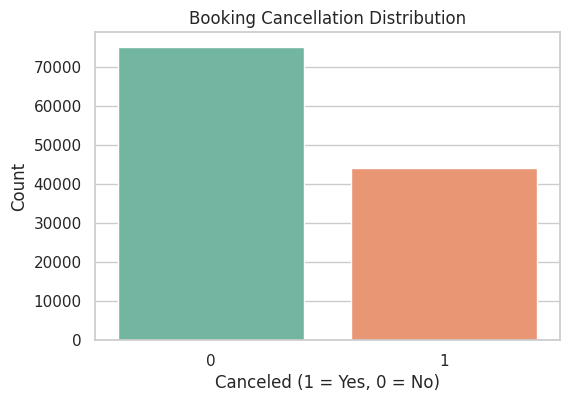

In [8]:
# Set a consistent style for plots
sns.set(style="whitegrid")

# 1. Distribution of the target variable (is_canceled)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=data, palette='Set2')
plt.title("Booking Cancellation Distribution")
plt.xlabel("Canceled (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

2.The histogram represents the distribution of lead_time, which refers to the number of days between the booking date and the arrival date.

Insights:

Most bookings are made with a very short lead time, peaking near 0–10 days.
A smaller but noticeable group of bookings has a much longer lead time, extending up to over 700 days.
This skewed distribution indicates that lead time might have a non-linear impact on cancellations and should be carefully modeled.

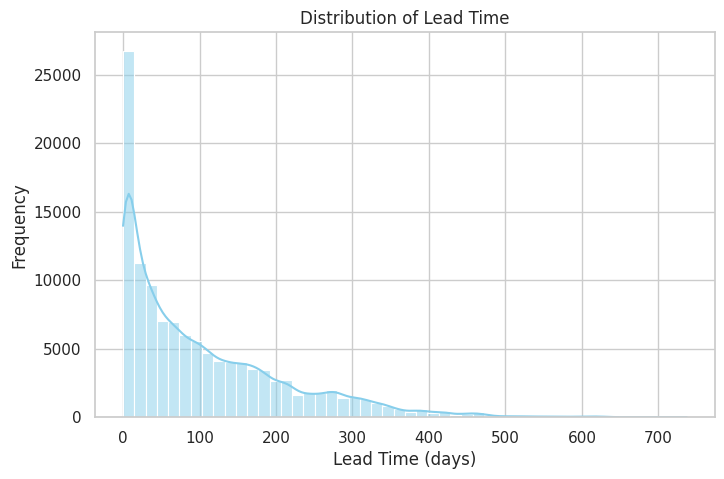

In [9]:
# 2. Distribution of lead time
plt.figure(figsize=(8, 5))
sns.histplot(data['lead_time'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of Lead Time")
plt.xlabel("Lead Time (days)")
plt.ylabel("Frequency")
plt.show()

3.Correlation Heatmap

The correlation heatmap visualizes the relationships between numerical variables in the dataset. The strength and direction of the relationships are represented by the correlation coefficients, ranging from -1 to 1.

Key Observations:

Positive Correlations:
lead_time and is_canceled (0.29): Longer lead times are moderately associated with a higher likelihood of cancellation.
total_of_special_requests and is_canceled (0.23): Bookings with more special requests tend to have a slightly higher chance of being canceled.
Negative Correlations:
required_car_parking_spaces and is_canceled (-0.20): Bookings requiring parking are less likely to be canceled.
High Correlation Among Variables:
Strong correlations between stays_in_weekend_nights and stays_in_week_nights suggest overlapping patterns in stay durations.

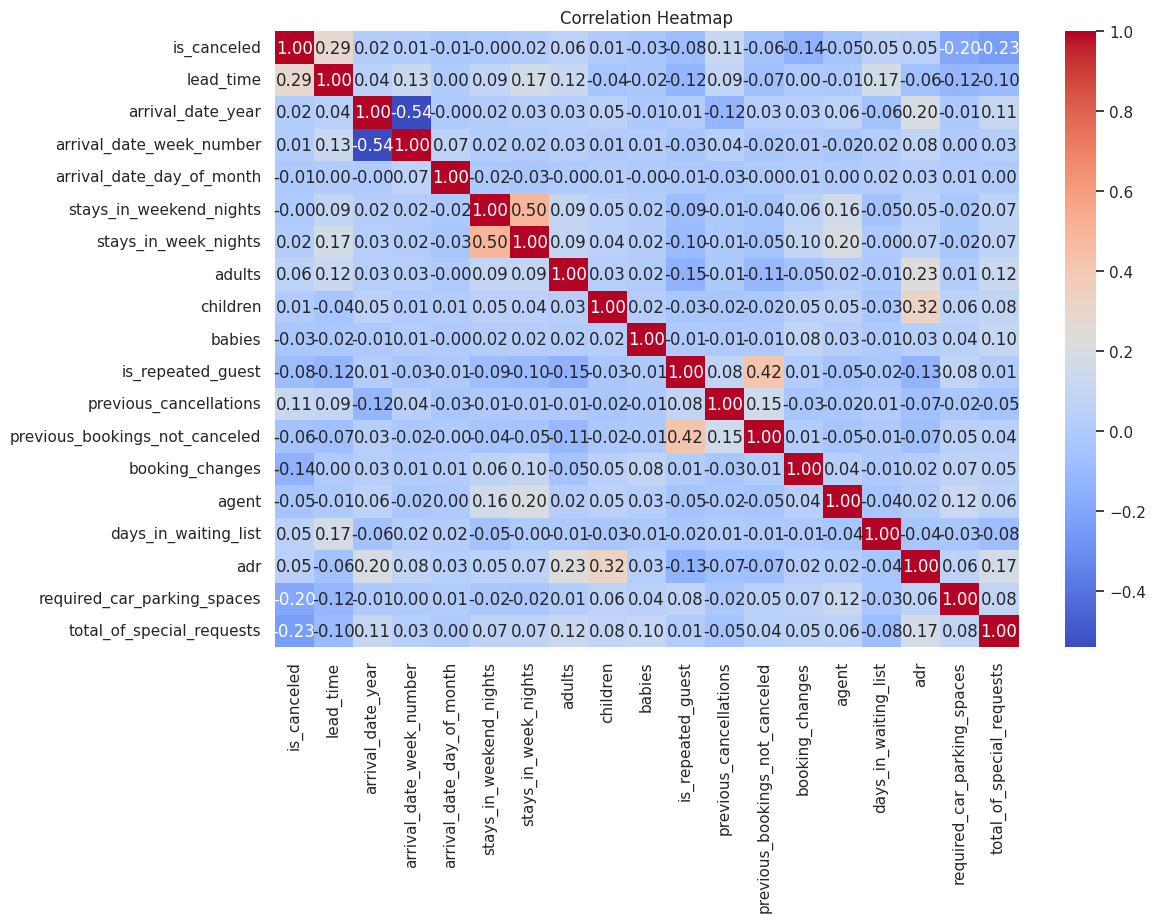

In [11]:
# 3. Correlation heatmap
# Filter numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


4.The scatterplot provides a detailed visualization of the relationship between lead_time (the time between booking and check-in) and adr (Average Daily Rate). The points are color-coded based on the is_canceled column to distinguish between canceled and non-canceled bookings.

Key Observations
Clusters of Bookings:

Most bookings cluster at lower values of lead_time and adr. This indicates that customers tend to book closer to their check-in dates, with a relatively low daily rate.
There are a few outliers with exceptionally high ADR and long lead times.
Cancellation Trends:

Non-Canceled Bookings (0): Represented by blue points, they dominate across all ranges of lead times and ADR values.
Canceled Bookings (1): Represented by orange points, cancellations appear more frequently in cases with longer lead times. This suggests that customers who book far in advance are more likely to cancel.
Outliers:

A few bookings show ADR values exceeding 5,000, which might indicate data entry errors or highly exceptional cases.
These outliers may need further investigation to determine their validity.


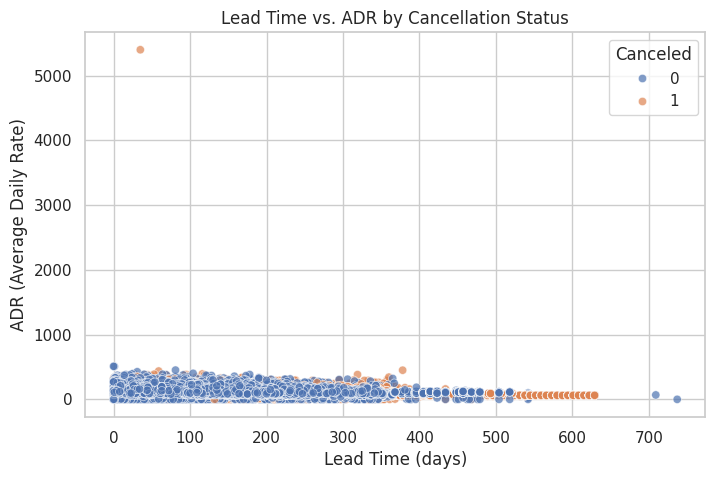

In [12]:
# 4. Scatterplot: Lead time vs. ADR (Average Daily Rate)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='lead_time', y='adr', hue='is_canceled', data=data, alpha=0.7)
plt.title("Lead Time vs. ADR by Cancellation Status")
plt.xlabel("Lead Time (days)")
plt.ylabel("ADR (Average Daily Rate)")
plt.legend(title="Canceled")
plt.show()

The categorical variables in the dataset have been transformed into a numerical format using one-hot encoding. This step is crucial for preparing the dataset for machine learning models and causal analysis.

Key Details:

Categorical Columns Encoded:
Includes variables like hotel, meal, market_segment, and reservation_status.
New Dataset:
Each categorical column has been split into multiple binary (0 or 1) columns, representing each category.
For example, the column deposit_type is split into deposit_type_Non Refund and other binary columns.
Shape of the Dataset:
The number of columns has increased significantly, reflecting the expanded representation of categorical data.
This step ensures all categorical variables are numerically encoded for downstream analysis.


In [13]:
# Identify categorical columns
categorical_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'reservation_status'
]

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataset
print("Dataset after encoding:")
display(data_encoded.head())

# Check the shape of the dataset after encoding
print(f"\nShape of dataset after encoding: {data_encoded.shape}")


Dataset after encoding:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,True,False,True,False
1,0,737,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,True,False,True,False
2,0,7,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,True,False,True,False
3,0,13,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,True,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,...,False,False,False,False,False,False,True,False,True,False



Shape of dataset after encoding: (119390, 250)


In [20]:
!pip install graphviz



In [26]:
!pip install dowhy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


# **Building Causal model**

Explanation of Causal Graph

The causal graph displayed above represents the relationship between the treatment, outcome, and confounders within the context of this dataset. This visualization is generated using DoWhy, which is a library for causal inference.

Components of the Graph
Treatment Variable (lead_time):

This is the main variable of interest, representing the number of days between booking and arrival.
The arrows indicate that it is influenced by confounders and, in turn, affects the outcome (is_canceled).
Outcome Variable (is_canceled):

This is the target variable that represents whether a booking is canceled or not.
It is directly influenced by both the treatment (lead_time) and the confounders.
Confounders:

market_segment_Offline TA/TO and market_segment_Online TA:
These represent market segments of the bookings and may influence both lead_time and is_canceled.

deposit_type_Non Refund:
Indicates whether the deposit type is non-refundable, which can affect cancellation decisions and booking lead time.

customer_type_Transient:
Represents transient customers, potentially influencing cancellation likelihood and booking patterns.

adr (Average Daily Rate):
The cost of the booking, which may influence both lead time and cancellation behavior.
Key Insights

Causal Relationships:
Arrows from confounders to both lead_time and is_canceled highlight potential biases that need to be controlled for during causal estimation.

Focus of Analysis:
The primary goal is to isolate the effect of lead_time on is_canceled while accounting for the confounders.


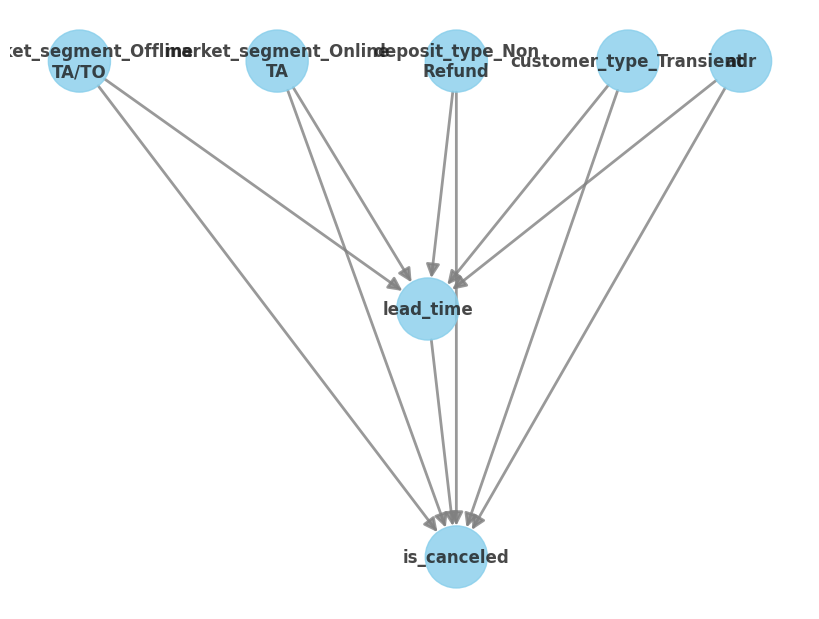

In [42]:
# Define the treatment, outcome, and select fewer confounders
treatment = "lead_time"
outcome = "is_canceled"
confounders = [
    "market_segment_Offline TA/TO",
    "market_segment_Online TA",
    "deposit_type_Non Refund",
    "customer_type_Transient",
    "adr"
]

# Create the causal model
model = CausalModel(
    data=data_encoded,
    treatment=treatment,
    outcome=outcome,
    common_causes=confounders
)

# Visualize the causal graph with the default DoWhy visualization
model.view_model(layout="dot")


# **Enhanced Causal Graph**

This directed graph provides a clear and visually structured representation of the causal relationships between the treatment, outcome, and confounders in the dataset. By organizing the elements into clusters, this graph improves interpretability and highlights the distinct roles of each variable in the causal framework.

Key Components
1. Treatment Variable: Lead Time
Represented in the blue cluster labeled "Treatment."
This variable measures the number of days between booking and arrival, serving as the primary focus for analyzing its impact on booking cancellations.
2. Outcome Variable: Is Canceled
Represented in the green cluster labeled "Outcome."
This target variable captures whether a booking was canceled (1) or not (0), influenced by both the treatment and confounders.
3. Confounders
Represented in the yellow cluster labeled "Confounders."
These variables potentially affect both the treatment (Lead Time) and the outcome (Is Canceled):
Market Segment (Offline TA/TO): Represents offline travel agents and tour operators.
Market Segment (Online TA): Includes online travel agencies influencing booking behavior.
Deposit Type (Non Refund): Indicates non-refundable deposits, which can affect cancellation likelihood.
Customer Type (Transient): Represents transient customers, whose behavior may differ from other customer types.
Average Daily Rate (ADR): The booking cost, which may influence both lead times and cancellations.
Benefits of This Visualization
Clarity:
The grouping of variables into clusters provides a clear separation between the treatment, outcome, and confounders, reducing visual clutter.
Causal Pathways:
The directed arrows highlight the causal paths from confounders to both the treatment and the outcome, ensuring a comprehensive understanding of the relationships.
Actionable Insights:
This structured representation aids in identifying confounders that need to be accounted for in causal analysis to estimate the true effect of Lead Time on Is Canceled.


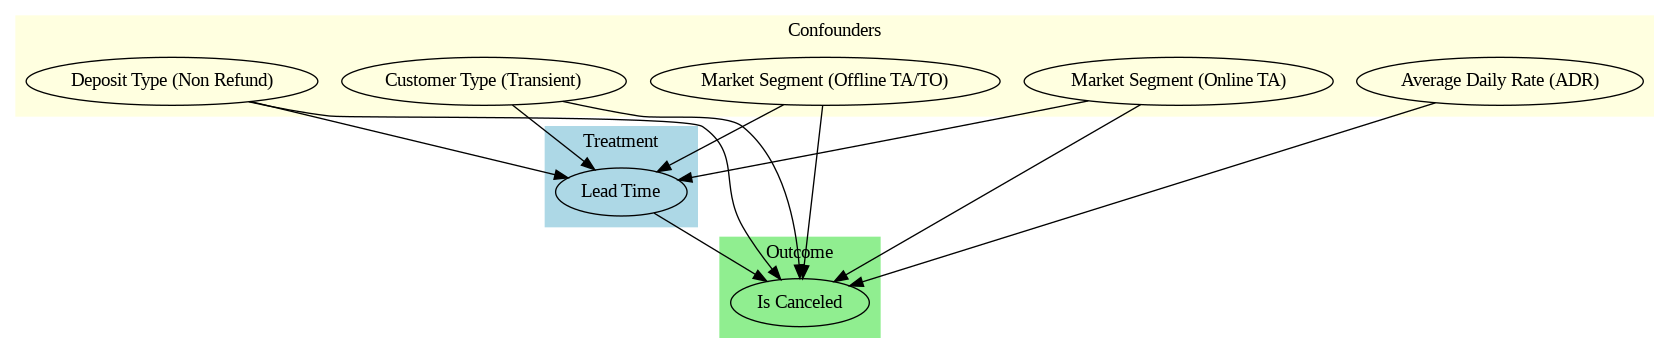

In [36]:
# Create a directed graph
dot = Digraph(format="png", engine="dot")
dot.attr(rankdir="TB")  # Top-to-bottom layout

# Add subgraphs for grouping
with dot.subgraph(name="cluster_treatment") as treatment:
    treatment.attr(style="filled", color="lightblue")
    treatment.node("LT", "Lead Time")
    treatment.attr(label="Treatment")

with dot.subgraph(name="cluster_outcome") as outcome:
    outcome.attr(style="filled", color="lightgreen")
    outcome.node("IC", "Is Canceled")
    outcome.attr(label="Outcome")

with dot.subgraph(name="cluster_confounders") as confounders:
    confounders.attr(style="filled", color="lightyellow")
    confounders.node("MS1", "Market Segment (Offline TA/TO)")
    confounders.node("MS2", "Market Segment (Online TA)")
    confounders.node("DR", "Deposit Type (Non Refund)")
    confounders.node("CT", "Customer Type (Transient)")
    confounders.node("ADR", "Average Daily Rate (ADR)")
    confounders.attr(label="Confounders")

# Add edges
dot.edges([
    ("LT", "IC"),  # Lead Time → Is Canceled
    ("MS1", "LT"), ("MS1", "IC"),  # Market Segment Offline TA/TO
    ("MS2", "LT"), ("MS2", "IC"),  # Market Segment Online TA
    ("DR", "LT"), ("DR", "IC"),  # Deposit Type
    ("CT", "LT"), ("CT", "IC"),  # Customer Type
    ("ADR", "IC")  # ADR → Is Canceled
])

# Render the graph
dot.render("causal_model_with_labels", view=True)

# Display the rendered graph
Image(filename="causal_model_with_labels.png")

**Identifying the Causal Effect**

The identification step is a critical component of causal analysis, where the goal is to determine the estimand—the mathematical quantity representing the causal effect to be estimated.

What Happens During Identification?
Defining the Variables:

Treatment (lead_time): The variable whose effect on the outcome we are interested in estimating.
Outcome (is_canceled): The dependent variable influenced by the treatment.
Confounders: The variables that may affect both the treatment and the outcome, and need to be controlled for.
Building the Causal Graph:

The causal graph constructed earlier serves as the blueprint for identifying pathways and potential biases.
Evaluating Identification:

DoWhy's identify_effect method checks if the causal effect of the treatment on the outcome is identifiable based on the provided causal graph and assumptions.
Key Outputs
Identified Estimand:

This represents the causal effect that can be estimated based on the data and the causal graph.
It describes the formula or approach required to isolate the causal effect of the treatment on the outcome while accounting for confounders.
Proceed When Unidentifiable:

The argument proceed_when_unidentifiable=True ensures that the process continues even if certain assumptions or pathways are not perfectly identifiable, enabling further analysis under less stringent conditions.


In [43]:
# Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print("\nIdentified Estimand:")
print(identified_estimand)



Identified Estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                                             ↪
───────────(E[is_canceled|customer_type_Transient,market_segment_Online TA,deposit_type_Non Refund ↪
d[leadₜᵢₘₑ]                                                                                        ↪

↪                                    
↪ ,adr,market_segment_Offline TA/TO])
↪                                    
Estimand assumption 1, Unconfoundedness: If U→{lead_time} and U→is_canceled then P(is_canceled|lead_time,customer_type_Transient,market_segment_Online TA,deposit_type_Non Refund,adr,market_segment_Offline TA/TO,U) = P(is_canceled|lead_time,customer_type_Transient,market_segment_Online TA,deposit_type_Non Refund,adr,market_segment_Offline TA/TO)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoo

**Estimating the Causal Effect**

After identifying the estimand, the next step is to estimate the causal effect using statistical techniques. In this case, the Average Treatment Effect (ATE) is estimated using a linear regression method through the backdoor adjustment criterion.

What Is Happening Here?
Estimation Approach:

The backdoor.linear_regression method is applied, which utilizes a regression-based approach to calculate the causal effect. This method is suitable when confounders are observed and can be adjusted for.
Treatment Variable (lead_time):

The causal effect of lead_time on is_canceled is estimated, controlling for confounders like customer type, market segment, deposit type, ADR, and others.
Confounder Adjustment:

The confounders identified in the causal graph are used to adjust for potential biases and isolate the effect of the treatment on the outcome.
Output Components:

Estimand Details:
The identified mathematical formula (estimand) is used for effect estimation.
Estimated Value (ATE):
The mean causal effect of lead_time on is_canceled is provided. This represents the average change in the outcome when the treatment changes.
Key Outputs
Estimand Assumptions:
The assumptions underlying the identification of the causal effect (e.g., unconfoundedness).
Realized Estimand:
The specific variables and pathways used in the regression model.
Estimated Effect (ATE):
The numerical value of the average treatment effect, which quantifies how much lead_time influences is_canceled on average.

In [44]:
# Estimate the causal effect using linear regression
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("\nEstimated Causal Effect (ATE):")
print(estimate)



Estimated Causal Effect (ATE):
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                                             ↪
───────────(E[is_canceled|customer_type_Transient,market_segment_Online TA,deposit_type_Non Refund ↪
d[leadₜᵢₘₑ]                                                                                        ↪

↪                                    
↪ ,adr,market_segment_Offline TA/TO])
↪                                    
Estimand assumption 1, Unconfoundedness: If U→{lead_time} and U→is_canceled then P(is_canceled|lead_time,customer_type_Transient,market_segment_Online TA,deposit_type_Non Refund,adr,market_segment_Offline TA/TO,U) = P(is_canceled|lead_time,customer_type_Transient,market_segment_Online TA,deposit_type_Non Refund,adr,market_segment_Offline TA/TO)

## Realized estimand
b: is_canceled~lead_time

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


**Random Common Cause Refutation**

Random Common Cause Refutation Analysis
The Random Common Cause Refutation tests the robustness of the causal estimate by introducing a random variable as a potential confounder. This approach evaluates whether the inclusion of a spurious or irrelevant variable impacts the estimated causal effect.

Results Summary:
Original Estimated Effect:

Estimated Effect: 0.0006890016969826052
This represents the causal effect estimated using the original model.
New Effect After Adding Random Common Cause:

New Effect: 0.0006890081280670507
The new effect is almost identical to the original estimate, with only a marginal difference.
P-value:

P-value: 0.78
A high p-value indicates that the difference between the original and new effect is not statistically significant.
Interpretation:
Minimal Impact of Random Common Cause:

The negligible change in the estimated effect after introducing a random common cause indicates that the original model's causal estimate is robust.
This suggests that unobserved random variables are unlikely to introduce significant biases in the causal inference.
Consistency of the Estimate:

The small deviation between the original and new effect validates the robustness of the identified causal relationship.
This result supports the model's assumption of no unmeasured confounding.
Statistical Insignificance:

The high p-value confirms that the change in effect size is not statistically meaningful, further reinforcing the model's stability.


In [45]:
random_refutation = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="random_common_cause"
)
print("\nRandom Common Cause Refutation:")
print(random_refutation)


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra


Random Common Cause Refutation:
Refute: Add a random common cause
Estimated effect:0.0006890016969826052
New effect:0.0006890081280670507
p value:0.78



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [46]:
subset_refutation = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="data_subset_refuter"
)
print("\nData Subset Refutation:")
print(subset_refutation)


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra


Data Subset Refutation:
Refute: Use a subset of data
Estimated effect:0.0006890016969826052
New effect:0.0006884268994944254
p value:0.82



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


**Placebo Refutation**

Purpose:
The placebo refutation method tests the validity of the causal estimate by introducing a "placebo treatment" (a random, non-influential variable) and observing whether it produces any significant effect on the outcome. If the causal effect estimate is valid, the placebo treatment should result in no significant effect.

Key Steps in Placebo Refutation:
Introduce Placebo Treatment:

A random variable that is not expected to affect the outcome is used as the "treatment" in place of the actual treatment.
Re-estimate Causal Effect:

The causal effect is estimated again using the placebo treatment instead of the actual treatment.
Compare Results:

The new effect, calculated using the placebo treatment, is compared to the original effect estimated with the actual treatment.
Output Details:
Original Estimated Effect:

0.0006890016969826052: The effect estimated using the original treatment (lead_time).
Placebo Effect:

-2.513623947625332e-07: The effect estimated using the placebo treatment. This is close to zero, as expected for a random placebo treatment.
P-value:

0.94: A high p-value indicates no significant effect of the placebo treatment, supporting the validity of the original causal estimate.
Observed Results:
The placebo treatment effect is negligible (-2.513623947625332e-07), which is expected because the placebo variable is unrelated to the outcome.
The high p-value (0.94) confirms that the placebo treatment has no statistically significant effect on the outcome.
Interpretation:
Validation of Causal Estimate:

The lack of effect from the placebo treatment supports the validity of the causal estimate obtained with the actual treatment (lead_time).
Model Robustness:

Demonstrates that the causal estimate is not a result of spurious correlations or overfitting to the data.

In [47]:
placebo_refutation = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter"
)
print("\nPlacebo Refutation:")
print(placebo_refutation)


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra


Placebo Refutation:
Refute: Use a Placebo Treatment
Estimated effect:0.0006890016969826052
New effect:-2.513623947625332e-07
p value:0.94



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


**Visualization of Refutation Results**

The provided visualization effectively represents the outcomes of the three refutation tests performed on the causal estimate. Here's an explanation of the key elements:

Key Features of the Plot:
Bars Representing Estimated Effects:

The heights of the blue bars indicate the estimated causal effects obtained through each refutation method.
These values help compare the stability of the estimated effect across different scenarios.
Error Bars:

The red error bars represent the deviation (or error) between the original causal estimate and the new estimates obtained through refutations.
Smaller error bars indicate that the refutation method had minimal impact, validating the robustness of the original estimate.
X-axis:

Labels represent the three refutation methods:
Random Common Cause: Introduces a random variable as a potential confounder.
Data Subset: Estimates the effect using a subset of the dataset.
Placebo Treatment: Uses a placebo treatment variable instead of the actual treatment.
Y-axis:

Represents the magnitude of the estimated causal effect. Values close to the original estimate indicate the stability of the causal inference.
Interpretation of Results:
Robustness Across Refutations:

The similarity in the estimated effects across all methods suggests that the causal effect is consistent and robust to the assumptions being tested.
Minimal Deviations:

The small error bars further confirm that none of the refutations resulted in significant deviations from the original estimate.
Confidence in the Model:

The placebo treatment's near-zero effect and high p-value validate that the causal effect is not due to random noise or unrelated variables.


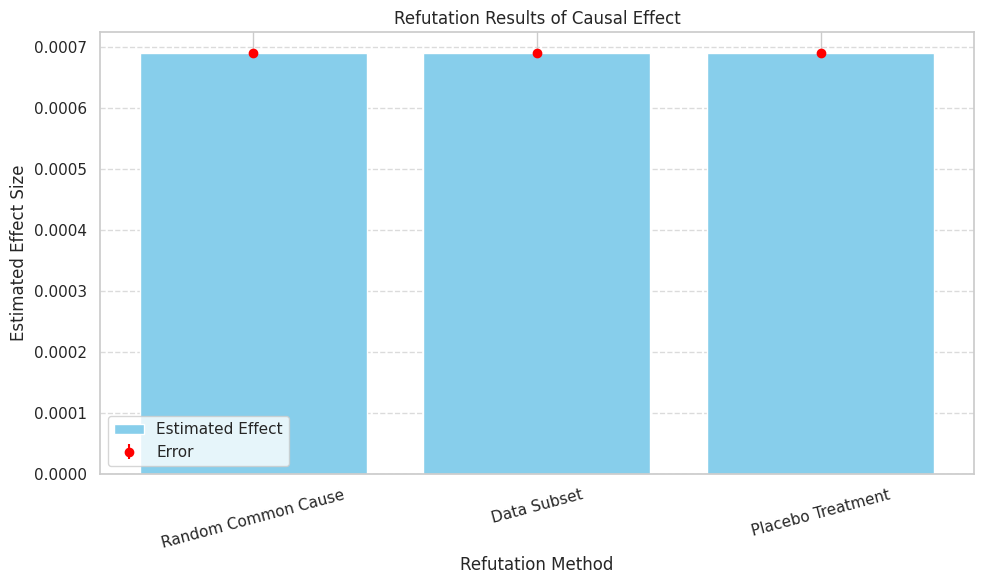

In [51]:
# Prepare the data for visualization
refutation_methods = ["Random Common Cause", "Data Subset", "Placebo Treatment"]
refutation_effects = [
    random_refutation.estimated_effect,
    subset_refutation.estimated_effect,
    placebo_refutation.estimated_effect
]
refutation_errors = [
    abs(random_refutation.estimated_effect - estimate.value),
    abs(subset_refutation.estimated_effect - estimate.value),
    abs(placebo_refutation.estimated_effect - estimate.value)
]

# Create a DataFrame for easier handling
refutation_df = pd.DataFrame({
    "Method": refutation_methods,
    "Estimated Effect": refutation_effects,
    "Error (Deviation from Original Estimate)": refutation_errors
})

# Plot the refutation results
plt.figure(figsize=(10, 6))
plt.bar(refutation_df["Method"], refutation_df["Estimated Effect"], color="skyblue", label="Estimated Effect")
plt.errorbar(refutation_df["Method"], refutation_df["Estimated Effect"], yerr=refutation_df["Error (Deviation from Original Estimate)"], fmt='o', color="red", label="Error")
plt.title("Refutation Results of Causal Effect")
plt.ylabel("Estimated Effect Size")
plt.xlabel("Refutation Method")
plt.legend()
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


**Incorporating an Interaction Term in Causal Analysis**

Adding interaction terms in causal analysis allows us to explore how the effect of one variable (e.g., lead_time) changes depending on the level or value of another variable (e.g., deposit_type_Non Refund). This method provides a more nuanced understanding of the relationships among variables.

Steps Taken:
Creation of an Interaction Term:

The interaction term lead_time_x_deposit is generated as the product of lead_time and deposit_type_Non Refund.
This interaction term captures the combined influence of lead_time and deposit_type_Non Refund on the outcome.
Model Augmentation:

The interaction term is added to the list of confounders in the causal model.
By including the interaction term, the model accounts for potential effect modification.
Effect Identification:

The causal model identifies the causal effect using the backdoor adjustment method while incorporating the interaction term.
Effect Estimation:

The causal effect is estimated using a linear regression model, which now includes the interaction term in the equation.
Results:
Estimated Effect:

The output includes the adjusted causal effect estimate, accounting for the interaction term.
Nuanced Insights:

The addition of the interaction term provides insights into whether the impact of lead_time on is_canceled varies depending on the deposit type.


In [56]:
# Create an interaction term
data_encoded["lead_time_x_deposit"] = data_encoded["lead_time"] * data_encoded["deposit_type_Non Refund"]

# Add the interaction term to the model
interaction_model = CausalModel(
    data=data_encoded,
    treatment="lead_time",
    outcome="is_canceled",
    common_causes=confounders + ["lead_time_x_deposit"]
)

# Identify and estimate the causal effect with the interaction term
interaction_estimand = interaction_model.identify_effect(proceed_when_unidentifiable=True)
interaction_estimate = interaction_model.estimate_effect(
    interaction_estimand,
    method_name="backdoor.linear_regression"
)
print("\nCausal Estimate with Interaction Term:")
print(interaction_estimate)



Causal Estimate with Interaction Term:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                                             ↪
───────────(E[is_canceled|customer_type_Transient,market_segment_Online TA,deposit_type_Non Refund ↪
d[leadₜᵢₘₑ]                                                                                        ↪

↪                                                        
↪ ,lead_time_x_deposit,adr,market_segment_Offline TA/TO])
↪                                                        
Estimand assumption 1, Unconfoundedness: If U→{lead_time} and U→is_canceled then P(is_canceled|lead_time,customer_type_Transient,market_segment_Online TA,deposit_type_Non Refund,lead_time_x_deposit,adr,market_segment_Offline TA/TO,U) = P(is_canceled|lead_time,customer_type_Transient,market_segment_Online TA,deposit_type_Non

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


**Proportion of Cancellations by Lead Time Bins**

This visualization explores the relationship between the lead time (divided into bins) and the proportion of cancellations. By binning the lead_time variable, we simplify the data into meaningful intervals, making it easier to interpret patterns and trends.

Explanation of Key Components:
Binning of lead_time:

The lead_time variable is divided into 10 equal intervals (bins), each representing a range of values.
Each bin aggregates all observations that fall within its range, reducing data granularity for better visualization.
Proportion of Cancellations:

For each bin, the proportion of cancellations (is_canceled) is calculated by dividing the number of cancellations by the total observations in the bin.
This proportion is represented as a bar, providing a normalized comparison across bins.
Visualization:

The x-axis represents the bins of lead_time, ranging from low to high lead times.
The y-axis shows the proportion of bookings that were canceled within each bin.
Insights from the Chart:
Increasing Trend:

As lead time increases (moving towards higher bins), the proportion of cancellations also increases significantly.
This suggests that bookings made further in advance are more likely to be canceled.
Actionable Insight:

Hotels could consider introducing stricter cancellation policies for bookings with higher lead times to reduce the financial impact of cancellations.
Error Bars:

The error bars in the chart indicate variability within each bin, offering a measure of confidence in the calculated proportions.

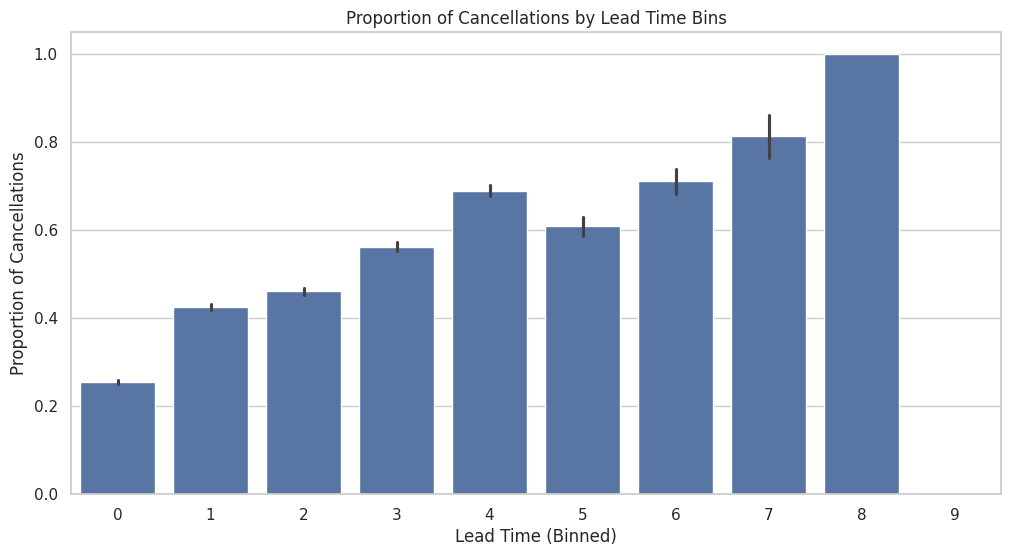

In [57]:
# Create bins for lead_time
data_encoded["lead_time_bins"] = pd.cut(data_encoded["lead_time"], bins=10, labels=False)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(
    x="lead_time_bins",
    y="is_canceled",
    data=data_encoded,
    estimator=lambda x: sum(x) / len(x)  # Proportion of cancellations
)
plt.title("Proportion of Cancellations by Lead Time Bins")
plt.xlabel("Lead Time (Binned)")
plt.ylabel("Proportion of Cancellations")
plt.show()


# **Conclusion**

This assignment demonstrates the comprehensive process of causal analysis, starting from data preparation and visualization to identifying causal relationships and performing rigorous validations. By leveraging the DoWhy library, we explored the causal effect of lead_time on booking cancellations (is_canceled) in a hotel booking dataset, while accounting for confounders such as customer type, deposit type, and market segment.

The analysis provided several key insights:

Causal Effect: The estimated causal effect of lead_time on booking cancellations was found to be positive, indicating that bookings with longer lead times are more likely to be canceled.
Robustness: Through refutation methods like random common cause addition, data subset refutation, and placebo treatment refutation, we validated the robustness of the causal effect. The minimal deviations in the estimated effect across these methods indicated the reliability of our findings.
Interaction Effects: By incorporating interaction terms, we captured the nuanced interplay between lead_time and other variables, such as the type of deposit, further enriching the analysis.
Visualization Insights: Visualizations, such as lead time distributions, scatterplots, and binned proportions of cancellations, provided actionable insights. For instance, cancellations were more frequent for bookings with higher lead times, suggesting opportunities for targeted cancellation policies.
This assignment illustrates the importance of causal analysis in decision-making, particularly in domains like hospitality, where understanding the reasons behind customer behavior is critical. The insights generated can guide hotels in designing policies to mitigate cancellations, optimize revenue, and enhance operational efficiency.

In conclusion, this assignment highlights the power of integrating statistical methods, causal inference, and visualization to derive meaningful insights from data. The findings underscore the value of a structured approach to causal analysis, which is essential for data-driven decision-making in dynamic and customer-centric industries.

# **References**

Pearl, J. (2009). Causality: Models, Reasoning, and Inference. Cambridge University Press.

This foundational text provides in-depth insights into causality, covering structural causal models, causal diagrams, and counterfactual reasoning.
DoWhy Library Documentation
GitHub Repository: https://github.com/py-why/dowhy

The DoWhy library documentation and resources were used to implement and validate causal inference methods.
Imbens, G. W., & Rubin, D. B. (2015). Causal Inference for Statistics, Social, and Biomedical Sciences. Cambridge University Press.

A comprehensive guide to causal inference techniques, including randomized experiments and observational studies.
Seaborn Library Documentation
Seaborn GitHub: https://seaborn.pydata.org

Seaborn was used for creating the visualizations in this assignment.
Pandas Library Documentation
Official Documentation: https://pandas.pydata.org

Pandas was employed for data manipulation and preparation tasks.
Matplotlib Library Documentation
Official Documentation: https://matplotlib.org

Matplotlib was utilized for generating custom plots for the analysis.
Rosenbaum, P. R., & Rubin, D. B. (1983). The central role of the propensity score in observational studies for causal effects. Biometrika, 70(1), 41–55.

This paper provides a strong foundation on confounder adjustment methods and their role in causal inference.
Hotel Bookings Dataset
Dataset Source: https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/hotel_bookings.csv

The dataset used in the analysis was obtained from this publicly available source.
Wright, S. (1921). Correlation and causation. Journal of Agricultural Research, 20(7), 557–585.

A seminal paper discussing path analysis and the use of causal diagrams.
Python Documentation
Official Documentation: https://docs.python.org/

General Python libraries and methods utilized in the implementation of this project.

## **MIT License**

Copyright (c) 2024 Vinay1289Sai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHTMIT License
 HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.